In [1]:
# Goal: Investigate how the early LC from that shock model look like in the beginning
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt

In [5]:
# first lets investigate Piro+Nakar+2013 version

# time since explosion
t_d = np.linspace(0.5, 20)

energy = 2e51
mass = 5 # Msol
kappa = 0.1

# photosphere (eqn 11)
r_ph = 3e14 * (kappa/0.1)**0.11 * (energy/1e51)**0.39 * t_d**0.78 / mass**0.28

plt.plot(t_d, np.log10(r_ph))

In [9]:
# ok.. now lets move to Piro+2020

# first lets look at t_ph; timescale when photosphere reaches depth where v ~ v_t

v_t = np.linspace(10e3, 20e3) * 1e5 # cm/s

kappa = 0.34 # cm^2 / g

K = 0.119

plt.figure(figsize=(11,11))
for mass in [0.01, 0.05, 0.1]:
    mass_g = mass*u.Msun.to(u.g)
    
    for n in [4, 5, 8]:
        t_ph = np.sqrt(3*kappa*K*mass_g/2/(n-1)/v_t**2)
        plt.plot(v_t, t_ph/3600/24, label='M=%.2f n=%d' % (mass, n))
plt.grid()
plt.legend()

In [10]:
# seems like even at high velocity and small mass there are a couple days until that happens
# this means that (eqn 7) from the paper is valid for a little while early on

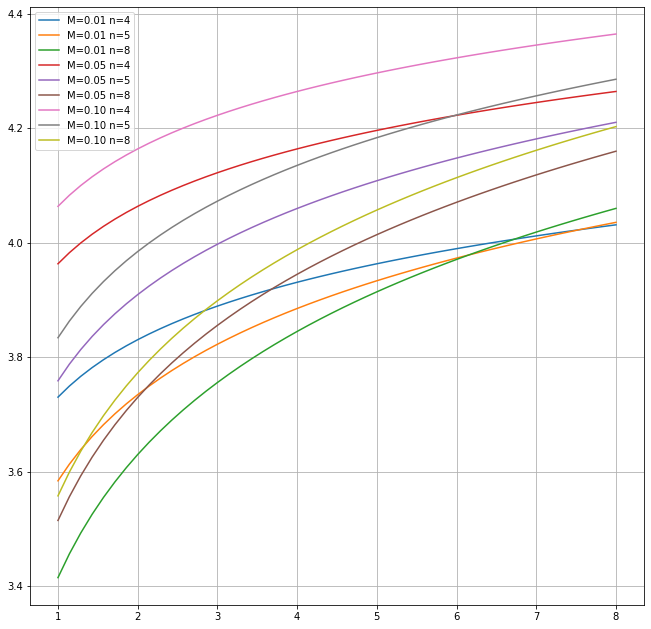

In [14]:
v_t = 15e3 * 1e5 # cm/s

kappa = 0.34 # cm^2 / g

K = 0.119

t = np.linspace(1, 8)*24*3600

CM_TO_RSUN = u.cm.to(u.Rsun)

plt.figure(figsize=(11,11))
for mass in [0.01, 0.05, 0.1]:
    mass_g = mass*u.Msun.to(u.g)
    
    for n in [4, 5, 8]:
        t_ph = np.sqrt(3*kappa*K*mass_g/2/(n-1)/v_t**2)
        r_ph = (t_ph/t)**(2/(n-1)) * v_t * t
        plt.plot(t/24/3600, np.log10(r_ph*CM_TO_RSUN), label='M=%.2f n=%d' % (mass, n))
plt.grid()
plt.legend()